In [1]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import uncertainties
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp

import colors

# Set matplotlib font to resemble LaTeX's default font (Computer Modern)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.usetex'] = True

In [45]:
orange = ["#ffac00"]
darkorange = ["#662089"]
blue = ["#1B4882"]
green = ["#086361"]
darkgreen = ["#2c853c"]
deepgreen=["#4B6143"]
red = ["#e85c47"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        orange.append(colors.get_alpha_hex(orange[0],beta[i]))
        darkorange.append(colors.get_alpha_hex(darkorange[0],beta[i]))
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        green.append(colors.get_alpha_hex(green[0],beta[i]))
        darkgreen.append(colors.get_alpha_hex(darkgreen[0],beta[i]))
        deepgreen.append(colors.get_alpha_hex(deepgreen[0],beta[i]))
        red.append(colors.get_alpha_hex(red[0],beta[i]))

In [7]:
swap_num_file = h5py.File("../data/processed_data/SwapSample_num_U-8.0_N64_Lx8_Ly8_LA16_beta18.0_seed2182.jld")
swap_denom_file = h5py.File("../data/processed_data/SwapSample_denom_U-8.0_N64_Lx8_Ly8_LA16_beta18.0_seed1235.jld")

swap_num = swap_num_file["p_num"][:]
swap_denom = swap_denom_file["p_denom"][:]

In [38]:
replica_file_0 = h5py.File("../data/processed_data/ReplicaSample_attrHub_Lx8_Ly8_LA16_N64_U-8.0_lambda0.0_beta50.0_seed1250.jld")
replica_file_1 = h5py.File("../data/processed_data/ReplicaSample_attrHub_Lx8_Ly8_LA16_N64_U-8.0_lambda0.2_beta50.0_seed1251.jld")
replica_file_2 = h5py.File("../data/processed_data/ReplicaSample_attrHub_Lx8_Ly8_LA16_N64_U-8.0_lambda0.4_beta50.0_seed1252.jld")
replica_file_3 = h5py.File("../data/processed_data/ReplicaSample_attrHub_Lx8_Ly8_LA16_N64_U-8.0_lambda0.6_beta50.0_seed1253.jld")
replica_file_4 = h5py.File("../data/processed_data/ReplicaSample_attrHub_Lx8_Ly8_LA16_N64_U-8.0_lambda0.8_beta50.0_seed1254.jld")

replica_sample_0 = replica_file_0["detgA"][:]
replica_sample_1 = replica_file_1["detgA"][:]
replica_sample_2 = replica_file_2["detgA"][:]
replica_sample_3 = replica_file_3["detgA"][:]
replica_sample_4 = replica_file_4["detgA"][:]

In [75]:
bins1 = np.linspace(min(swap_num + swap_denom), max(swap_num + swap_denom), 30)
bins2 = np.linspace(min(replica_sample_0 + replica_sample_4), max(replica_sample_0 + replica_sample_4), 50)

Text(-0.16, 1.05, '(b)')

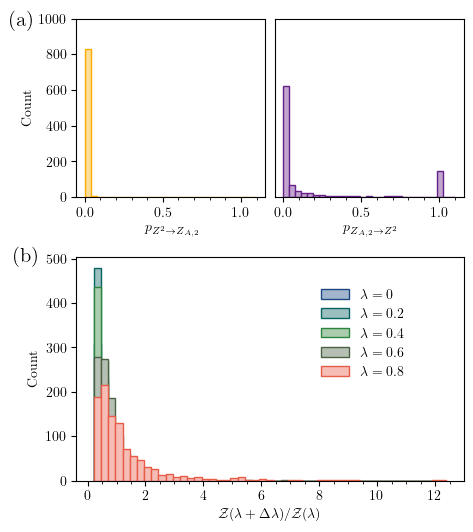

In [98]:
fig = plt.figure(figsize=(5, 6))
gs = gridspec.GridSpec(2, 2, wspace=0.05, hspace=0.3, height_ratios=[0.8, 1.0])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,:])

ax1.hist(swap_num, bins=bins1, edgecolor=orange[0], facecolor=orange[4])
ax1.set_xlabel(r'$p_{Z^2\rightarrow Z_{A,2}}$')
ax1.set_ylim(0, 1000)
ax1.set_ylabel('Count')
ax1.xaxis.set_minor_locator(AutoMinorLocator())

ax2.hist(swap_denom, bins=bins1, edgecolor=darkorange[0], facecolor=darkorange[4])
ax2.set_xlabel(r'$p_{Z_{A,2}\rightarrow Z^2}$')
ax2.set_ylim(0, 1000)
ax2.set_yticks([])
ax2.xaxis.set_minor_locator(AutoMinorLocator())

ax3.hist(replica_sample_0, bins=bins2, edgecolor=blue[0], facecolor=blue[4],             label=r"$\lambda=0$")
ax3.hist(replica_sample_1, bins=bins2, edgecolor=green[0], facecolor=green[4],           label=r"$\lambda=0.2$")
ax3.hist(replica_sample_2, bins=bins2, edgecolor=darkgreen[0], facecolor=darkgreen[4],   label=r"$\lambda=0.4$")
ax3.hist(replica_sample_3, bins=bins2, edgecolor=deepgreen[0], facecolor=deepgreen[4],   label=r"$\lambda=0.6$")
ax3.hist(replica_sample_4, bins=bins2, edgecolor=red[0], facecolor=red[4],               label=r"$\lambda=0.8$")
ax3.set_xlabel(r'$\mathcal{Z}(\lambda+\Delta\lambda) / \mathcal{Z}(\lambda)$')
ax3.set_ylabel('Count')
ax3.legend(frameon=False, ncol=1, bbox_to_anchor=(0.6, 0.40))
ax3.xaxis.set_minor_locator(AutoMinorLocator())

label_parameters = {'fontsize':15, 'verticalalignment':'top'}
ax1.text(-0.35, 1.05, '(a)', **label_parameters, transform=ax1.transAxes)
ax3.text(-0.16, 1.05, '(b)', **label_parameters, transform=ax3.transAxes)

In [96]:
fig.savefig("../figures/EtgEnt_AlgoComparison.pdf", bbox_inches='tight', pad_inches=0)
fig.savefig("../figures/EtgEnt_AlgoComparison.svg", bbox_inches='tight', pad_inches=0)